___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Access is denied.


In [2]:
#!pip install tensorflow==2.0

In [3]:
!pip install --ignore-installed --upgrade tensorflow==2.6

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [9]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [10]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


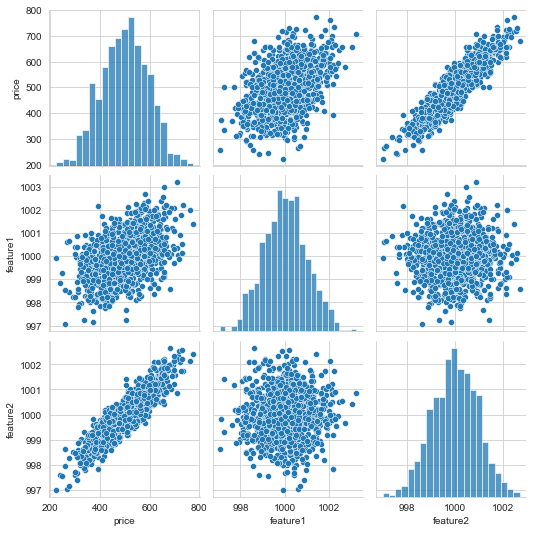

In [ ]:
sns.pairplot(df);

In [13]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [16]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
X_train.shape

(700, 2)

In [19]:
X_test.shape

(300, 2)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train.max()

1.0

In [25]:
X_train.min()

0.0

In [26]:
X_test.max()

1.0186515935232023

In [27]:
X_test.min()

-0.014108392024525074

## Modelling

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
help(Sequential)

In [ ]:
help(Dense)

In [3]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [4]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [5]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [28]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 2ms/step - loss: 256673.4844
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256344.8906
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256013.2812
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 255653.3438
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255267.3594
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 254851.3125
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254408.1406
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 253934.7031
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 253428.3594
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 252890.2188
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 252311.0156
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.53572667,  1.976338  ,  1.4006292 ,  1.8795636 ],
        [-0.6998161 ,  2.403802  ,  4.017748  ,  3.5533283 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.34237677,  0.71869475,  0.73010427,  0.72397536], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.28187537, -0.42818075,  0.580138  ,  0.6249065 ],
        [ 0.5803214 ,  1.8566693 , -0.7161747 ,  0.7030311 ],
        [-0.4495614 ,  2.6060567 , -0.5235879 ,  2.2151325 ],
        [-0.3053918 ,  2.6275342 ,  0.1911912 ,  2.1302373 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  0.70471334, -0.01449653,  0.301672  ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.3554535 , -0.44788954, -0.29641914, -0.34373784],
        [ 2.647277  ,  2.5392213

In [31]:
model.history.history

{'loss': [256673.484375,
  256344.890625,
  256013.28125,
  255653.34375,
  255267.359375,
  254851.3125,
  254408.140625,
  253934.703125,
  253428.359375,
  252890.21875,
  252311.015625,
  251668.203125,
  250962.5625,
  250193.96875,
  249353.59375,
  248447.046875,
  247468.5,
  246413.25,
  245283.5,
  244060.59375,
  242753.921875,
  241346.21875,
  239833.59375,
  238216.203125,
  236488.0625,
  234650.375,
  232700.203125,
  230625.28125,
  228405.625,
  226072.59375,
  223586.53125,
  220977.515625,
  218207.046875,
  215315.84375,
  212272.875,
  209065.1875,
  205736.28125,
  202231.0,
  198548.53125,
  194704.09375,
  190728.21875,
  186565.125,
  182281.984375,
  177842.890625,
  173213.9375,
  168415.890625,
  163516.5625,
  158434.046875,
  153220.609375,
  147848.609375,
  142353.03125,
  136728.453125,
  130982.7109375,
  125104.7734375,
  119157.40625,
  113120.3046875,
  107035.3359375,
  100871.453125,
  94636.578125,
  88402.84375,
  82161.1796875,
  75938.953125,

In [32]:
pd.DataFrame(model.history.history)

,loss
0,256673.484
1,256344.891
2,256013.281
3,255653.344
4,255267.359
...,...
245,24.140
246,24.267
247,24.351
248,24.231


<AxesSubplot:>

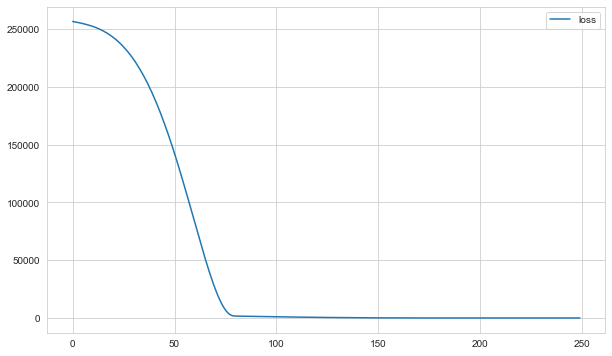

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

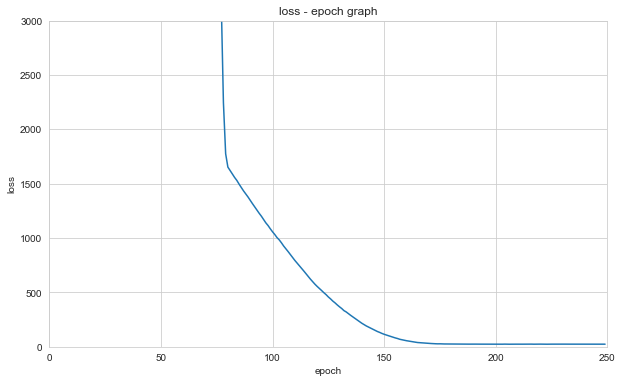

In [34]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [36]:
model.evaluate(X_train, y_train, verbose=0)

24.181289672851562

In [37]:
model.evaluate(X_test, y_test, verbose=0)

24.993362426757812

In [38]:
y_pred = model.predict(X_test)

In [39]:
explained_variance_score(y_test, y_pred)

0.997165098769947

In [40]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
200,610.580,606.253
115,477.806,478.396
178,606.297,600.636
108,567.882,565.900
18,674.311,662.219
95,610.297,608.092
16,512.049,508.105
91,438.977,439.134
49,478.358,485.077
83,454.329,458.390


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

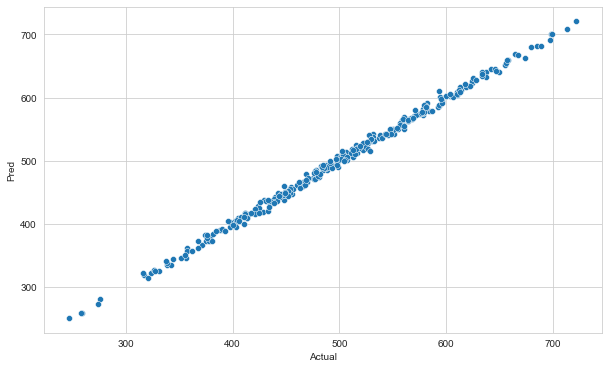

In [41]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [43]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [44]:
eval_metric(y_test, y_pred)

r2_score: 0.9971572704859301 
mae: 4.000845625573307 
mse: 24.99336790390639 
rmse: 4.999336746400105


## Final Model and Model Deployment

In [45]:
scaler = MinMaxScaler().fit(X)

In [46]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [47]:
X_scaled = scaler.transform(X)

In [48]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257391.2188
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257296.6562
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 257198.2969
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 257080.0312
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256938.7656
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 256770.7031
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 256572.9062
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 256342.8906
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 256071.8438
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 255752.9688
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 255381.4062
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [60]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model_fake_reg = load_model('model_fake_reg.h5')

In [64]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [65]:
sample = [[998, 1000]]

In [68]:
sample_scaled = scaler_fake_reg.transform(sample)

In [69]:
model_fake_reg.predict(sample_scaled)

array([[418.11356]], dtype=float32)

## Prediction-2

In [70]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [71]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [72]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [73]:
model_fake_reg.predict(sample_scaled)

array([[378.10834],
       [329.88385],
       [281.6593 ],
       [233.4348 ],
       [185.21027]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___